[T]ime is what keeps everything from happening at once.
—Ray Cummings

Financial time series data is one of the most important types of data in finance. This
is data indexed by date and/or time. For example, prices of stocks over time represent
financial time series data. Similarly, the EUR/USD exchange rate over time represents
a financial time series; the exchange rate is quoted in brief intervals of time, and a
collection of such quotes then is a time series of exchange rates.

Wes McKinney, the original and main
author of pandas, started developing the library when working as an analyst at AQR
Capital Management, a large hedge fund. It is safe to say that pandas has been
designed from the ground up to work with financial time series data.

# Financial Data

In [139]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use(plt.style.available[11])
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Data Import

pandas provides a number of different functions and DataFrame methods to import
data stored in different formats (CSV, SQL, Excel, etc.) and to export data to different
formats.

In [140]:
filename = 'data/tr_eikon_eod_data.csv'
f = open(filename, 'r')

In [141]:
f.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [142]:
data = pd.read_csv(filename, index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [143]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [144]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

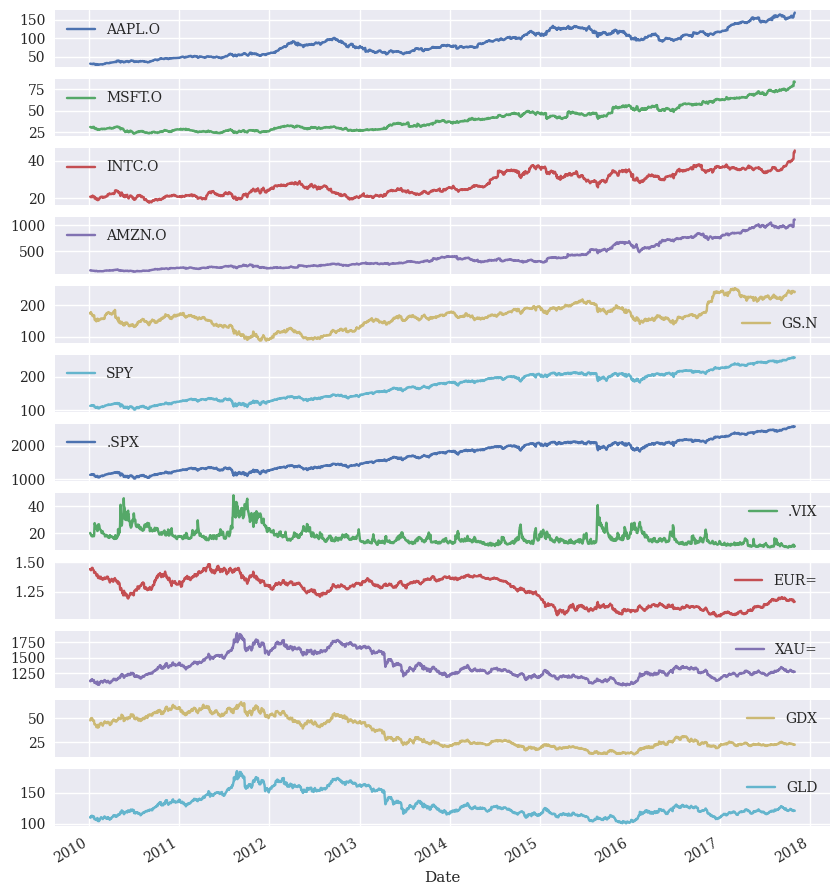

In [145]:
data.plot(figsize=(10, 12), subplots=True)

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR world
symbols for financial instruments are called Reuters Instrument Codes (RICs). The
financial instruments that the single RICs represent are:

In [146]:
instruments = ['Apple Stock', 'Microsoft Stock',
'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
'VIX Volatility Index', 'EUR/USD Exchange Rate',
'Gold Price', 'VanEck Vectors Gold Miners ETF',
'SPDR Gold Trust']

In [147]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


## Summary Statistics

In [148]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [149]:
data.aggregate("min mean std median".split()).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
median,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90


## Changes over Time

Statistical analysis methods are often based on changes over time and not the absolute values themselves. There are multiple options to calculate the changes in a time
series over time, including absolute differences, percentage changes, and logarithmic
(log) returns.

In [150]:
data.diff().describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,0.070252,0.026499,0.012486,0.492836,0.035211,0.072968,0.731745,-0.005003,-0.000140,0.076712,-0.012801,0.005515
std,1.377361,0.574626,0.397730,8.055523,2.554140,1.461570,14.603485,1.596520,0.007566,14.626353,0.807831,1.425182
min,-9.072134,-4.350000,-2.980000,-48.350000,-23.570000,-8.330000,-79.920000,-12.940000,-0.034500,-125.600000,-4.980000,-12.640000
25%,-0.564107,-0.252500,-0.195000,-2.710000,-1.385000,-0.570000,-5.775000,-0.660000,-0.004500,-6.915000,-0.440000,-0.670000
50%,0.061429,0.010000,0.015000,0.250000,0.090000,0.100000,0.880000,-0.080000,0.000100,0.330000,-0.010000,0.040000
75%,0.742856,0.290000,0.230000,3.625000,1.435000,0.880000,8.535000,0.535000,0.004100,7.900000,0.430000,0.720000
max,7.400000,5.050000,3.050000,128.520000,10.710000,7.190000,72.900000,16.000000,0.032700,66.940000,3.950000,5.970000


From a statistics point of view, absolute changes are not optimal because they are
dependent on the scale of the time series data itself. Therefore, percentage changes
are usually preferred.

In [151]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


<Axes: >

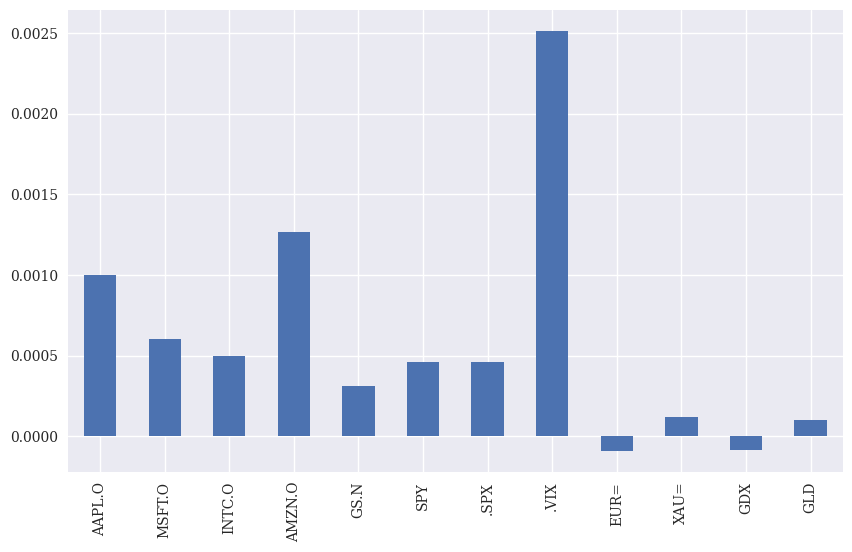

In [152]:
data.pct_change().mean().plot(kind = 'bar', figsize=(10, 6))

As an alternative to percentage returns, log returns can be used. In some scenarios,
they are easier to handle and therefore often preferred in a financial context.

In [153]:
rets = np.log(data/data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


Log returns have several advantages over simple percentage returns. One key advantage is additivity over time.

For simple returns, if we have returns $r_1$ and $r_2$ for two consecutive periods, the total return is:

$(1 + r_1)(1 + r_2) = 1 + r_1 + r_2 + r_1r_2$

However, for log returns $R_t = \ln(\frac{P_t}{P_{t-1}})$, we have:

$R_1 + R_2 = \ln(\frac{P_1}{P_0}) + \ln(\frac{P_2}{P_1}) = \ln(\frac{P_2}{P_0})$

This means log returns are additive over time, making them easier to work with mathematically. The cumulative log return from time 0 to T is simply the sum of the individual log returns:

$\sum_{t=1}^T R_t = \ln(\frac{P_T}{P_0})$

To get back to the price level, we can use:

$P_T = P_0 \cdot e^{\sum_{t=1}^T R_t}$

This is what we plot in the next cell using `cumsum()` and `np.exp()`.


<Axes: title={'center': 'cumulative log returns over time'}, xlabel='Date'>

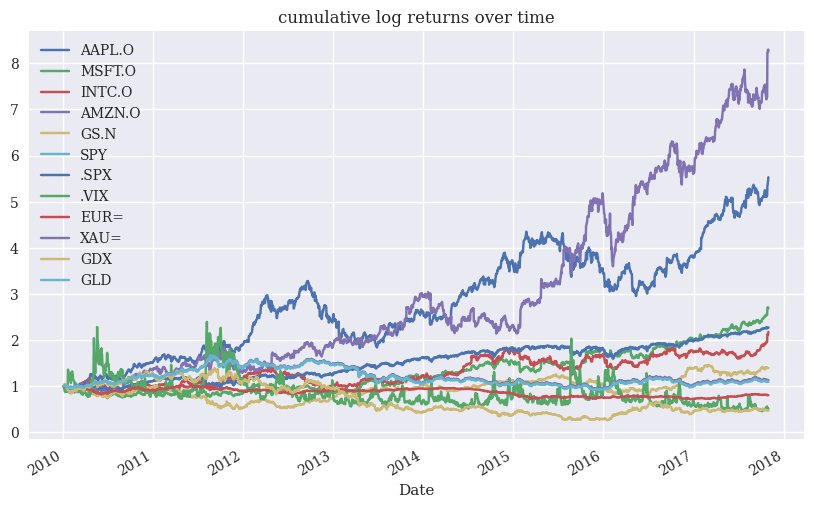

In [154]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6), title='cumulative log returns over time')

## Resampling

Resampling is an important operation on financial time series data. Usually this takes
the form of downsampling, meaning that, for example, a tick data series is resampled
to one-minute intervals or a time series with daily observations is resampled to one
with weekly or monthly observations.

In [155]:
data.resample('W', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [156]:
data.resample('ME', label='left').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2009-12-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-01-31,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-02-28,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-03-31,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-04-30,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


<Axes: xlabel='Date'>

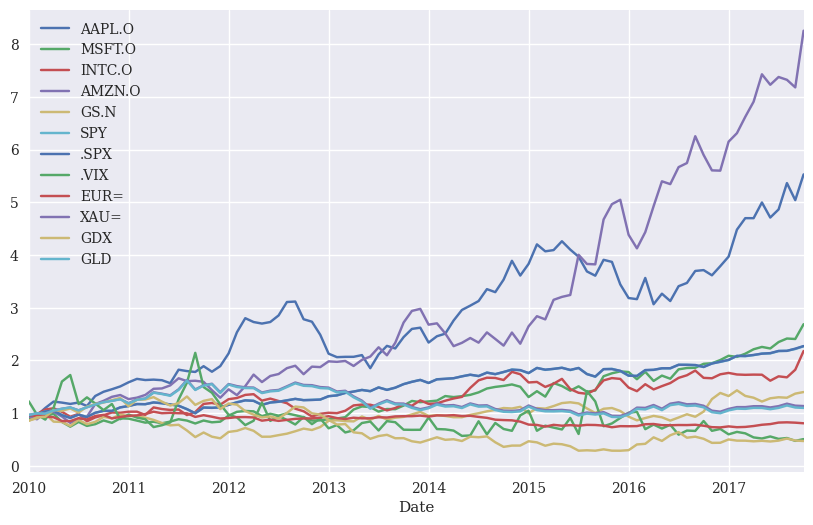

In [157]:
rets.cumsum().apply(np.exp).resample('ME', label='right').last().plot(figsize=(10, 6))

When resampling time series data, the `label` parameter determines how the timestamps are labeled:

- `label='right'`: The timestamp will be at the end of the period. For example, data from January 1-7 will be labeled as January 7.
- `label='left'`: The timestamp will be at the start of the period. For example, data from January 1-7 will be labeled as January 1.

The choice depends on your analysis needs:
- Use `right` when you want to emphasize when a period ends (common for financial data since values represent the final state)
- Use `left` when you want to emphasize when a period begins

Foresight bias—or, in its strongest form, perfect foresight—means that at some point in the financial analysis,
data is used that only becomes available at a later point. The result might be “too good” results, for example,
when backtesting a trading strategy.

# Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists
and technical traders.

In [158]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


## An Overview

In [159]:
window = 20
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() #calculates the exponentially weighted moving average, with decay in terms of a half life of 0.5
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


<Axes: xlabel='Date'>

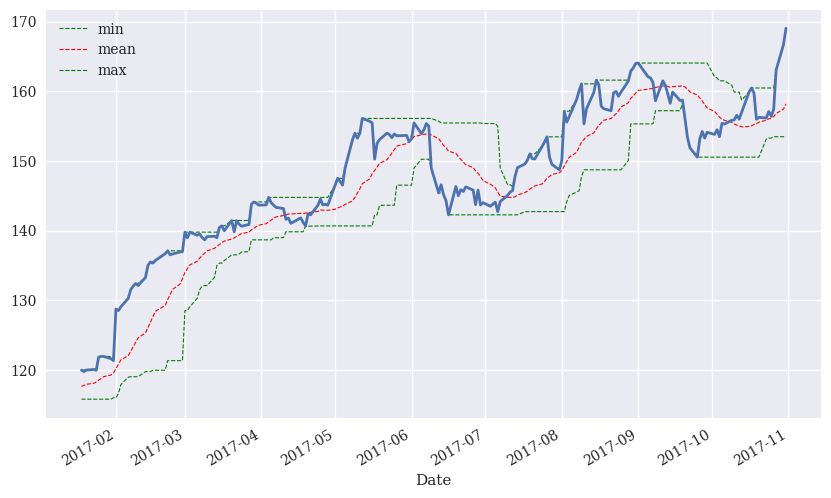

In [160]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

## A Technical Analysis Example

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports
and the strategic positions of the company whose stock is being analyzed.

A decades-old trading strategy based on technical analysis is using two simple moving
averages (SMAs). The idea is that the trader should go long on a stock (or financial
instrument in general) when the shorter-term SMA is above the longer-term SMA
and should go short when the opposite holds true. The concepts can be made precise
with pandas and the capabilities of the DataFrame object.

<Axes: xlabel='Date'>

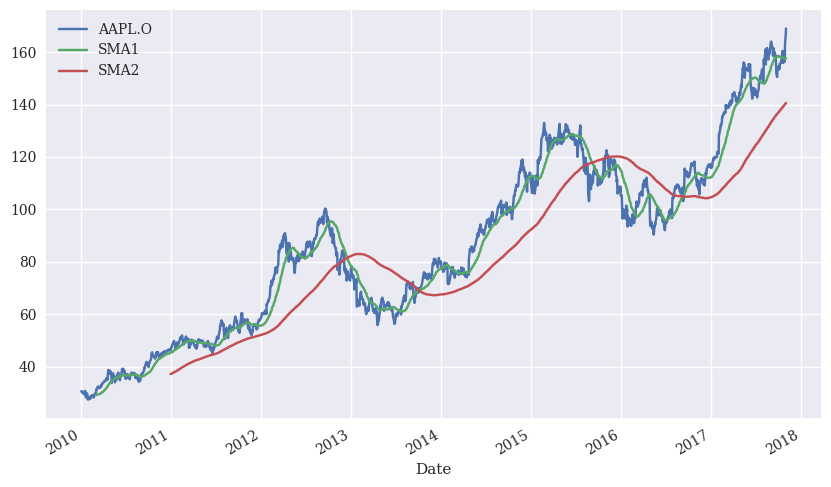

In [161]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

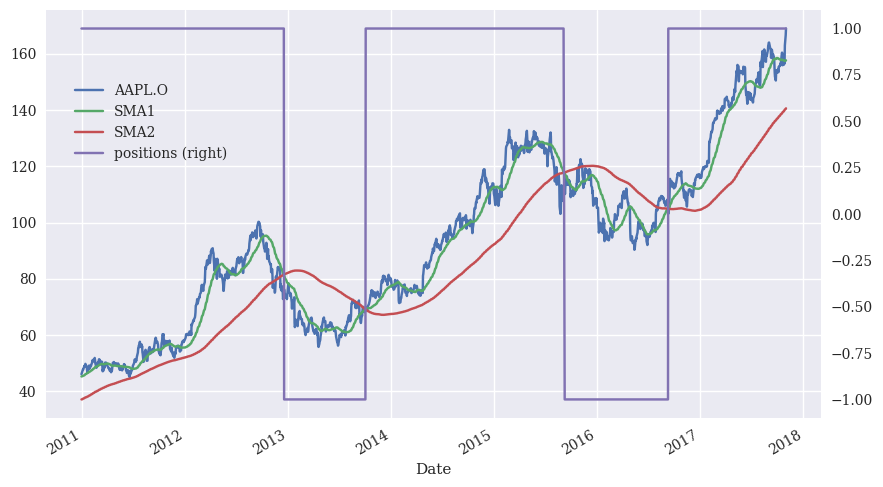

In [162]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Correlation Analysis

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is
about correlation and not causation. This section shows how to come up with some
supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are
(highly) negatively correlated.

## The Data

In [163]:
raw = pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.tail()


,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

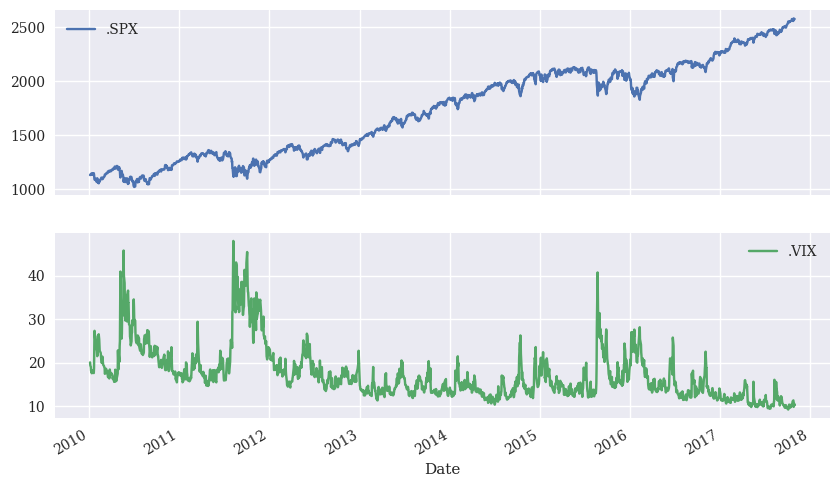

In [164]:
data.plot(subplots=True, figsize=(10, 6))

<Axes: xlabel='Date'>

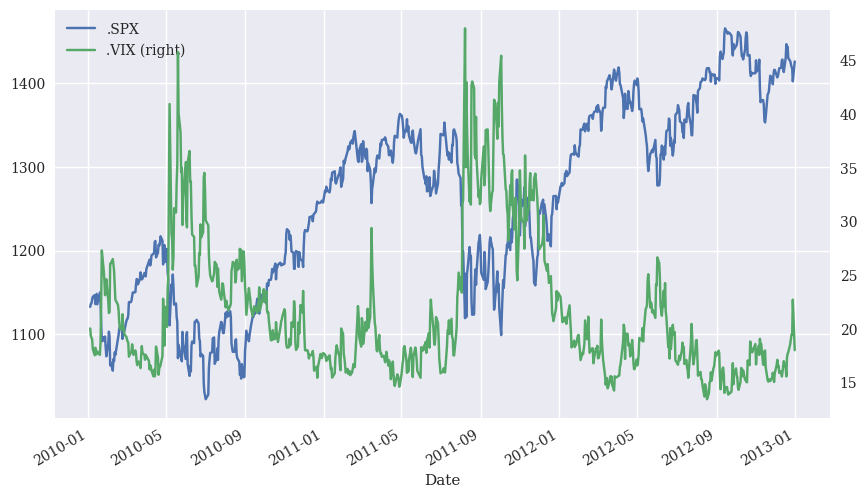

In [165]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6))

## Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before
any further analysis takes place.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

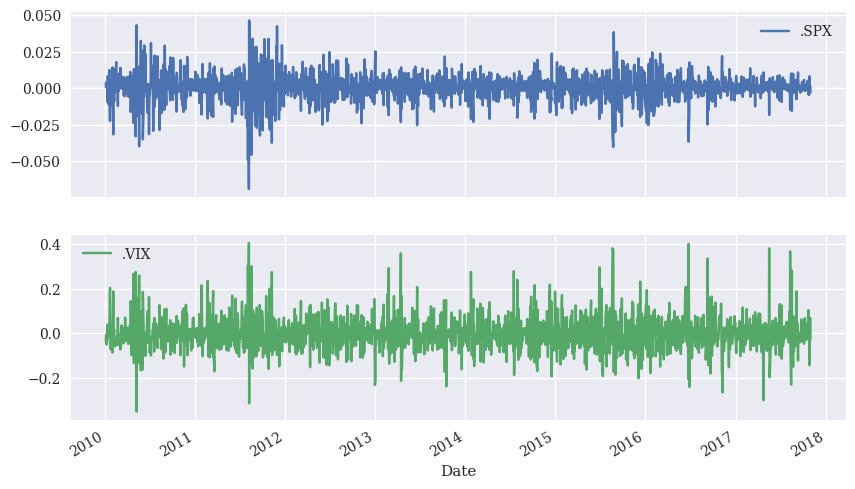

In [166]:
rets = np.log(data/data.shift(1))
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy
for visualizations. It plots the log returns of the two series against each other, and one
can add either a histogram or a kernel density estimator (KDE) on the diagonal.

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

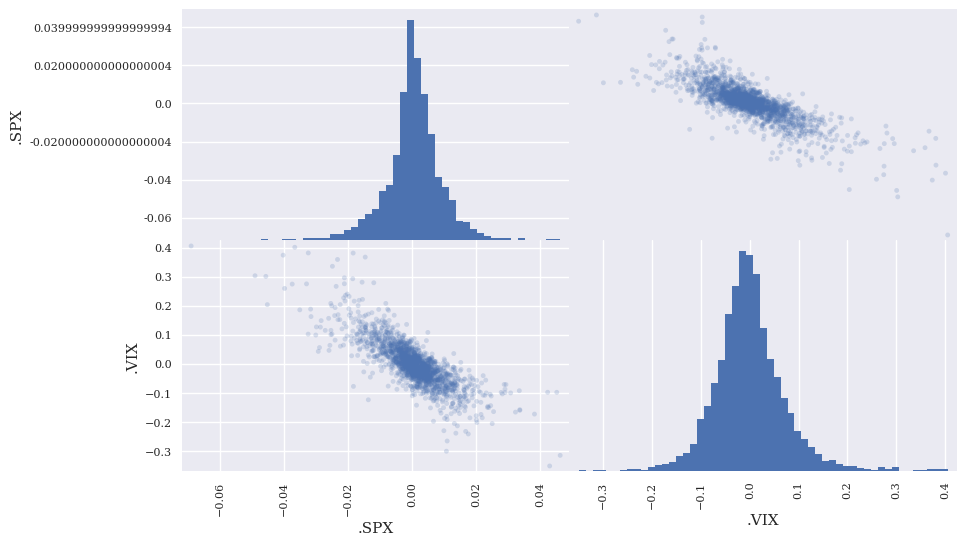

In [167]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins':53}, figsize=(10, 6))

## OLS Regression

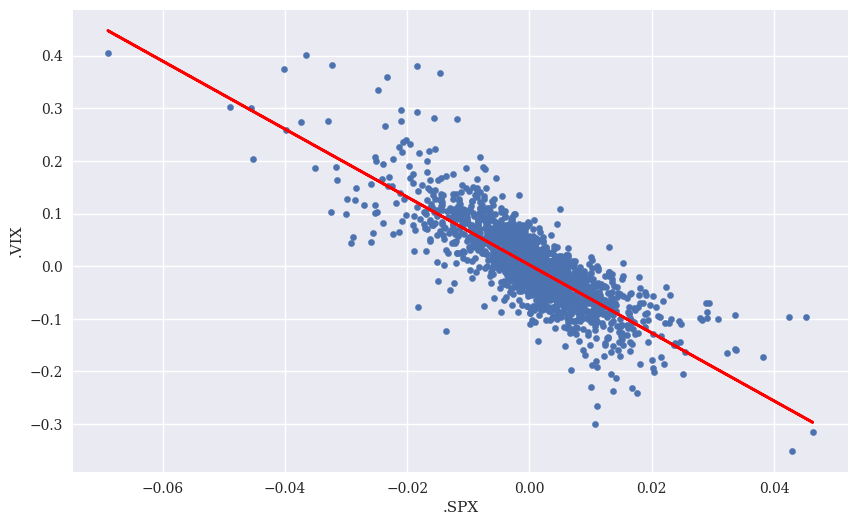

In [168]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) #x vs y regression
ax = rets.plot(kind='scatter', x = '.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2) #polyval is a*x + b

## Correlation

In [169]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


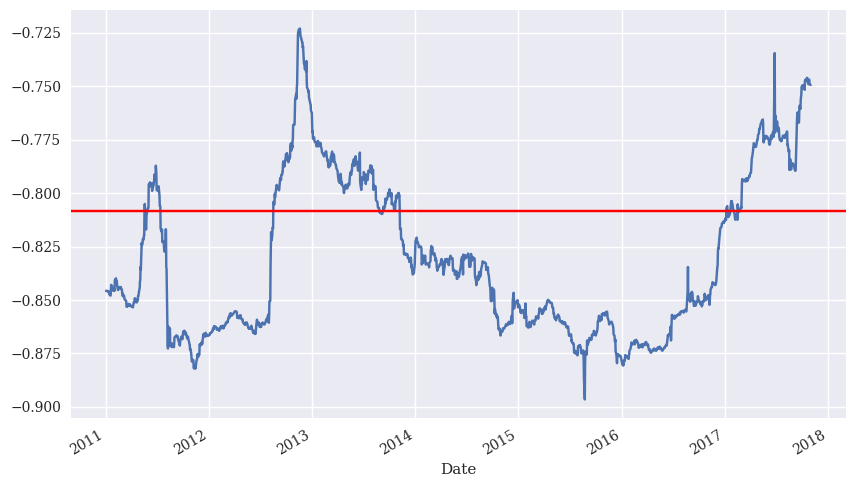

In [170]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')

# High-Frequency Data

In [171]:
tick = pd.read_csv('data/fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True)

In [172]:
tick = tick['OpenAsk	HighAsk	LowAsk	CloseAsk'.split()]
tick['mid'] = tick.mean(axis=1)

In [175]:
tick_resm = tick.resample(rule='ME', label='right').last()

<Axes: xlabel='Date'>

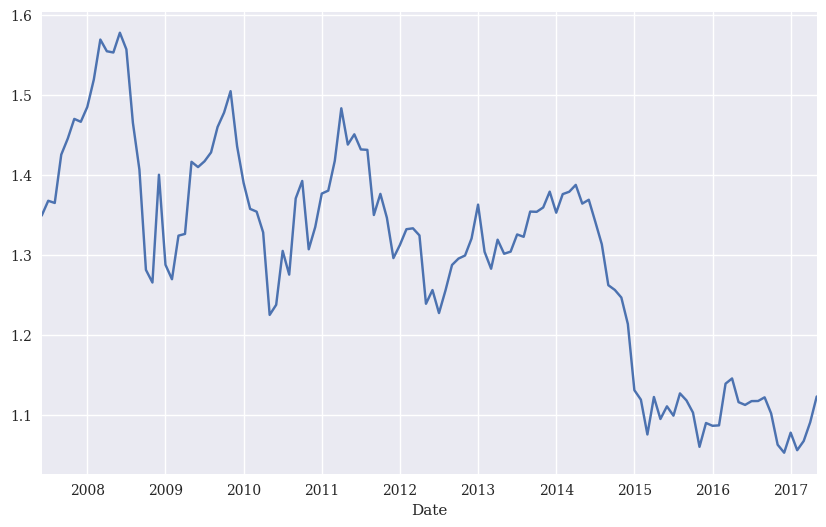

In [176]:
tick_resm['mid'].plot(figsize=(10, 6))